In [36]:
#Brianna Solano Aguilar
#Machine Learning for Engineers Final Product
#Housing Dataset
##################################################################

In [37]:
#importing libarires for models
from matplotlib import pyplot
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA

# Part A


---



In [38]:
dftrain = pd.read_csv ('housing_train.csv')
dftrain

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [39]:
print(dftrain.shape)
print("Number of training Samples: ", dftrain.shape[0])
print("Number of raw features: ", dftrain.shape[1])
print("Number of missing values: ", dftrain.isnull().sum().sum())
Cat = dftrain.select_dtypes(include='object')
print("Number of Catagorical Variables:", Cat.columns.values.shape[0])

(1460, 81)
Number of training Samples:  1460
Number of raw features:  81
Number of missing values:  6965
Number of Catagorical Variables: 43


In [40]:
print("axes = ", dftrain.axes)
print("dtype =\n", dftrain.dtypes)

axes =  [RangeIndex(start=0, stop=1460, step=1), Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea

(1460,)
(1460,)


<Figure size 640x480 with 0 Axes>

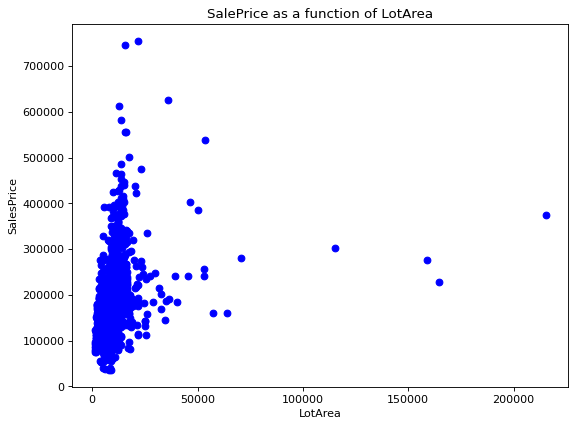

<Figure size 640x480 with 0 Axes>

In [41]:
LotArea = dftrain[dftrain.columns[4]]
print(LotArea.shape)
SalePrice = dftrain[dftrain.columns[80]]
print(SalePrice.shape)
pyplot.figure(figsize=(8, 6), dpi=80)
pyplot.figure(1)
pyplot.xlabel('LotArea') 
pyplot.ylabel('SalesPrice') 
# displaying the title
pyplot.title("SalePrice as a function of LotArea")
pyplot.plot(LotArea,SalePrice,'bo')
pyplot.figure(figsize=(8, 6), dpi=80)

(1379, 2)
Samples that have a GarageArea greater than zero = 1379


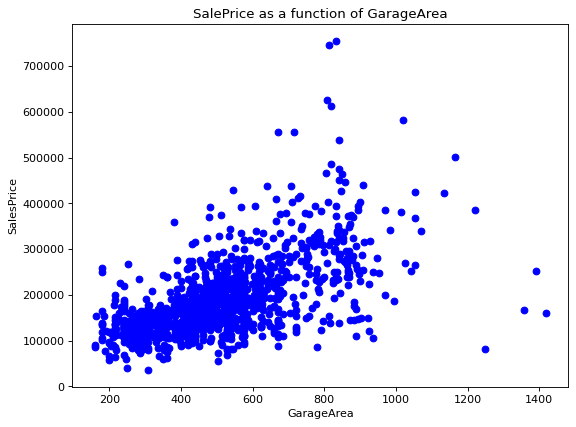

In [42]:
Garage = dftrain[['GarageArea']]
df = dftrain[['GarageArea', 'SalePrice']]
Garage = Garage.to_numpy()
df= df[df['GarageArea'] != 0]
print(df.shape)
print("Samples that have a GarageArea greater than zero =", df.shape[0])
pyplot.figure(figsize=(8, 6), dpi=80)
pyplot.figure(1)
pyplot.xlabel('GarageArea') 
pyplot.ylabel('SalesPrice')
pyplot.title("SalePrice as a function of GarageArea")
pyplot.plot(df.GarageArea,df.SalePrice,'bo')

The data contains a varaity of catagorical and continous varibles that effect the SalesPrice of multiple houses. There are a total of 1460 Samples in the data with an accompning 81 features. There are aslo a total of 6965 missing values and 43 catagorical variables. The data was then aslo plotted where one contained SalesPrice vs LotArea, and the other one contained SalesPrice vs GarageArea. The first plot, seems to contain a majority of it's points concentrated in a LotArea of 50000. There seems to be no true linear corelation between the LotArea and the SalePrice, since points seem to be grouped in an ovel. As for the second plot, we can see a postive correlation between GarageArea and SalesPrices. As the GargeArea gradually increases so does the SalePrice. SalesPrice as a function of GarageArea would be a plot to perform linear regression, since there seems to be a linear relationship between the two variables. 


# Part B


---



In [43]:
#Remove collumn that don't really effect the prediction of price
dftrain = dftrain.drop(['Street', 'Utilities', 'RoofMatl','Heating','HeatingQC','Functional'], axis=1)
#Both Street, RooftMat1, Utilties and Heating have less then 15 samples that defer from the rest. 
#Heating is tied to the Heating Quality, since heating is removed there is no need for HeatingQC. 
#Since we already have 

In [44]:
#Find collumns that contain the most missing values 
NullValues = dftrain.isnull().sum()
for i in range(0,75):
  if NullValues[i] > 500:
    print("Name:", dftrain.columns[i])

Name: Alley
Name: FireplaceQu
Name: PoolQC
Name: Fence
Name: MiscFeature


In [45]:
#Remove all these collumns since they seem to have no effect on Sales Price since a majority of their
#data values is null
dftrain = dftrain.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
dftrain.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 70, dtype: int64

In [46]:
#Find collumns that contain low missing values
NullValues = dftrain.isnull().sum()
for i in range(0,70):
  if ((NullValues[i] > 0) & (NullValues[i] < 20)):
    print("Name:", dftrain.columns[i])

Name: MasVnrType
Name: MasVnrArea
Name: Electrical


In [47]:
#Get rid of these rows with these values
#Since the number is really small, we can simply get rid of the rows. In total
#9 sample were elimated from the dataset
dftrain= dftrain.dropna(axis=0, subset=['Electrical','MasVnrType','MasVnrArea'])
dftrain.shape

(1451, 70)

In [48]:
#We go through the dataset and look for features that contain a large amount of 
#missing values
NullValues = dftrain.isnull().sum()
for i in range(0,70):
  if ((NullValues[i] > 0) & (NullValues[i] < 100)):
    print("Name:", dftrain.columns[i])

Name: BsmtQual
Name: BsmtCond
Name: BsmtExposure
Name: BsmtFinType1
Name: BsmtFinType2
Name: GarageType
Name: GarageYrBlt
Name: GarageFinish
Name: GarageQual
Name: GarageCond


In [49]:
#Fill in these missing values with their respective plosible values 
dftrain[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
0,Attchd,2003.0,RFn,TA,TA,Gd,TA,No,GLQ,Unf
1,Attchd,1976.0,RFn,TA,TA,Gd,TA,Gd,ALQ,Unf
2,Attchd,2001.0,RFn,TA,TA,Gd,TA,Mn,GLQ,Unf
3,Detchd,1998.0,Unf,TA,TA,TA,Gd,No,ALQ,Unf
4,Attchd,2000.0,RFn,TA,TA,Gd,TA,Av,GLQ,Unf
...,...,...,...,...,...,...,...,...,...,...
1455,Attchd,1999.0,RFn,TA,TA,Gd,TA,No,Unf,Unf
1456,Attchd,1978.0,Unf,TA,TA,Gd,TA,No,ALQ,Rec
1457,Attchd,1941.0,RFn,TA,TA,TA,Gd,No,GLQ,Unf
1458,Attchd,1950.0,Unf,TA,TA,TA,TA,Mn,GLQ,Rec


In [50]:
#Catagorical Values with NA will recieve None
dftrain['GarageType'] = dftrain['GarageType'].fillna('None')
dftrain['GarageFinish'] = dftrain['GarageFinish'].fillna('None')
dftrain['GarageQual'] = dftrain['GarageQual'].fillna('None')
dftrain['GarageCond'] = dftrain['GarageCond'].fillna('None')
dftrain['BsmtQual'] = dftrain['BsmtQual'].fillna('None')
dftrain['BsmtCond'] = dftrain['BsmtCond'].fillna('None')
dftrain['BsmtFinType1'] = dftrain['BsmtFinType1'].fillna('None')
dftrain['BsmtFinType2'] = dftrain['BsmtFinType2'].fillna('None')
dftrain['BsmtExposure'] = dftrain['BsmtExposure'].fillna('None')

#Continous Vales with NA will recieve 0
dftrain['GarageYrBlt'] = dftrain['GarageYrBlt'].fillna('0')
dftrain['LotFrontage'] = dftrain['LotFrontage'].fillna('0')

NullValues = dftrain.isnull().sum()
for i in range(0,70):
  if NullValues[i] > 0:
    print("Name:", dftrain.columns[i])

dftrain

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Reg,Lvl,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Reg,Lvl,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Reg,Lvl,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Reg,Lvl,Inside,Gtl,NAmes,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [51]:
#Print all the features and their types
print(dftrain.dtypes)
#Seperate all the features by catagorical and continous
df_continous = dftrain.select_dtypes(exclude='object')
df_catagorical = dftrain.select_dtypes(include='object')
#Print the two datasets
print("Continouse features")
print(df_continous)
print("Catagorical features")
print(df_catagorical)
#Create dummy variables for the catagorical set
df_catagorical= pd.get_dummies(df_catagorical, drop_first=True)
print("Hot Coded Catagorical Features")
print(df_catagorical)

Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage      object
LotArea           int64
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 70, dtype: object
Continouse features
        Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
0        1          60     8450            7            5       2003   
1        2          20     9600            6            8       1976   
2        3          60    11250            7            5       2001   
3        4          70     9550            7            5       1915   
4        5          60    14260            8            5       2000   
...    ...         ...      ...          ...          ...        ...   
1455  1456          60     7917            6            5       1999   
1456  1457          20    13175            6            6       1978   
1457  1458          70     9042           

In [52]:
#Remove Price from Data and make a sperate matrix for it
Y = df_continous["SalePrice"]
print("Contious Data shape with Sales Price:", df_continous.shape)
df_continous = df_continous.drop(['SalePrice'], axis=1)
print("Y shape:", Y.shape)
print("Contious Data shape After Sales Price:", df_continous.shape)

Contious Data shape with Sales Price: (1451, 36)
Y shape: (1451,)
Contious Data shape After Sales Price: (1451, 35)


In [53]:
#normalize the data to perform PCA
NormPCAonCont = stats.zscore(df_continous)

The data contain multiple features and some of these features don't really effect the SalePrice. An examples of this feature would be a variable that's values don't deveiate from the other through the whole dataset. Such as Street which contains a majority of it's values as Paved while only having one value as graval. Therefore, these features are removed to save computational power when calucalting the models. The data also contains missing values that need to be replaced with plausible values. This is done by either setting the value as none for catagorical features or 0 if the feature is continous. To perform these regression models to the dataset, we can't simply apply these models directly to the dataset. Hot encoding was used to replace the dataset with continouse values rather then a catagorical. This involved using 1 and 0 and creating a seperate feature for all the avalaible catagorical options for the respective feature. An example of this is having a feature,color, that can only take the value of blue and red. Therefore, with hot encoding, we would create 2 new features which would be labeled as red and blue. Samples that took the value red would contain 1 in the red feature and 0 in the blue feature. This method of hot encoding is done to catagorical values in the dataset. Lastly we conduct normalaiztion on the continous features such that we are able to conduct PCA

# Part C


---



**PCA**

In [54]:
#PCA will be performed and only obtain the 5 largest eignevalues
print("Before PCA:" , NormPCAonCont.shape)
pca = PCA(n_components= 5)
principalComponent = pca.fit_transform(NormPCAonCont)
print("After PCA:" , principalComponent.shape)
df = pd.DataFrame(principalComponent, columns = ['PCA1','PC2','PC3','PCA4','PC5'])
print(df.shape)
print("missing values:", df.isnull().sum().sum())

Before PCA: (1451, 35)
After PCA: (1451, 5)
(1451, 5)
missing values: 0


In [55]:
print("Shape of PCA:", df.shape)
print("Shape of Catagorical:", df_catagorical.shape)
print("missing values catagorical:", df_catagorical.isnull().sum().sum())
print("missing values PCA:", df_catagorical.isnull().sum().sum())

Shape of PCA: (1451, 5)
Shape of Catagorical: (1451, 388)
missing values catagorical: 0
missing values PCA: 0


In [56]:
#Turn both the the categorical matrix and continous matrix into numpy arrays
#Concatate both matricies into 1
PCAarry = df.to_numpy()
DummyVar = df_catagorical.to_numpy()
Data = np.concatenate((PCAarry, DummyVar),axis = 1)

PCA is only performed on the continous variables. Performing PCA on all the data would be possible, but wouldn't truly be meaningful since, it's a binary set and PCA is intended to be used on continouse values. Since Hot Encoding accounts for so many features, only the top 5 principles components are chosen. When using the function, we first state how many principle components we would like from the data. This is done by obtaining the 5 largest eigen values with their corresponding eigenvectors. Once stated, we call the function based on the data we input, in this case it's the housing data transformed into a (1451, 35) matrix.  This function calauclted the confusion matrix which is normalized data times its transpose. It then goes on to calculating egienvalues and egienvectors. If the computed eigenvalue is large, then their corresponding eigenvector contains important data dependcies. Unlike lower valued eigenvalues, such as eigenvalues near zero, which are relatively unimportant and that data depends on fewer components. Here PCA is taken with only the 5 largest eigenvalues. 

# Part D


---



**Regression**

In [57]:
#Add a collumn of 1s to accrount for the intercept. 
ones = np.ones((1451, 1))
X = np.concatenate((ones,Data), axis=1)
print(X.shape)

(1451, 394)


In [58]:
#Split data into train and test
Split = np.split(X, [1000])
Output = Y.to_numpy()
Split1 = np.split(Output, [1000])
X = Split[0]
X_test = Split[1]
Y = Split1[0]
Y = np.expand_dims(Y,axis=1)
Y_test = Split1[1]
Y_test = np.expand_dims(Y_test,axis=1)
print(X.shape)
print(X_test.shape)
print(Y.shape)
print(Y_test.shape)

(1000, 394)
(451, 394)
(1000, 1)
(451, 1)


The data is split into two sets. Training and Test, with training obtaining 1000 samples and testing containg 451 samples. 

Final Coefficients =  [ 5.59488309e+03  5.45846451e+04  5.44849544e+01  3.78379813e+03
 -5.85189094e+03 -4.45415923e+03  6.91941557e+03  4.00180120e+03
  5.82322694e+03  4.03185033e+03  4.73486951e+03  5.84100930e+03
  6.24590730e+03  1.85043929e+03  5.51922388e+03  4.87342477e+03
  4.34770513e+03  2.36337102e+03  3.68465664e+03  4.60414449e+03
  4.59367497e+03  7.49248112e+03  5.32668602e+03  5.94422913e+03
  6.48655818e+03  2.74085843e+03  0.00000000e+00  7.63421762e+03
  6.62098337e+03  6.82482964e+03  4.23560604e+03  3.90283504e+03
  5.00318154e+03  6.29415151e+03  4.73388891e+03  4.26627264e+03
  5.54047501e+03  4.75815268e+03  4.65357647e+03  5.93955792e+03
  4.68829669e+03  6.56999579e+03  6.48084699e+03  5.72509829e+03
  5.20541622e+03  5.49086676e+03  5.70721847e+03  5.42548912e+03
  6.51544101e+03  6.03576533e+03  4.72344703e+03  5.30510889e+03
  6.22504874e+03  6.20057503e+03  5.76019121e+03  5.97161056e+03
  6.16729441e+03  7.02276412e+03  6.37012853e+03  6.79434000e+03
  5

Text(0.5, 1.0, 'Stochastic Gradient Decent - Alpha = 0.001')

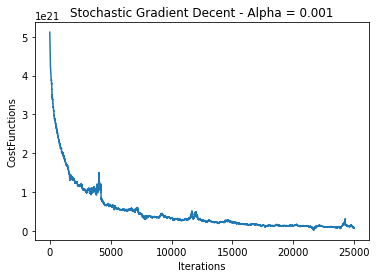

In [59]:
def costFun(theta,X,Y):
    prediction = X.dot(theta)
    J = np.square(np.sum(prediction-Y))
    return J

T = 25000
alpha = 0.001
cost_history = np.zeros(T)
theta = np.zeros([394,1])
for i in range(T):
    ipend = np.random.randint(1,len(Y))
    prediction = ((Y[ipend]-(theta.T.dot(X[ipend])))*X[ipend])
    theta = theta + alpha*prediction
    value = costFun(theta,X,Y)
    cost_history[i] = value

print("Final Coefficients = ", theta[0])
pyplot.plot(cost_history)
pyplot.xlabel('Iterations') 
pyplot.ylabel('CostFunctions')
pyplot.title("Stochastic Gradient Decent - Alpha = 0.001")

In [60]:
LinearRegPred = theta[0].dot(X_test.T)

Linear Regression is used as the first model in this dataset. Since it's a large dataset, rather then using gradient decent, Stocastic Gradient decent is used in which random samples from the training set would be seleted to train the model to obtain an accurate theta output. We set a step size of 0.001 with 25,000 iterations. Over each iteration theta is constantly updated by the step. We also see that cost function is expontentily decreasing as each iteration updates theta. Our ouput is a array of theta each representing a weight for each feature in a sample. To formulate a prediction with this output the sample is multiplied by theta and price prediction is formulated. 

**KNN Model**

In [61]:
from scipy import stats as s

def KNN(test,train):
  count = 0
  dist = np.zeros((451,1000))
  for j in range(451):
    for i in range(1000):
      sub = X_test[j][:]-X[i][:]
      dist[j,i] = np.linalg.norm(sub)
  return dist
dist = KNN(X_test,X)

In [62]:
def predic(k,dist,pre):
  count = 0
  labels = np.zeros(k)
  for i in range(451):
    sum = 0
    ind = np.argpartition(dist[i],k-1)[:k]
    for i in range(0,k):
      sum = Y[ind[i]] + sum
    sum = sum/k
    pre.extend(sum)
  return pre
  #The k nearest distances are added together and then divided by the k to
  #formulate a prediction

In [63]:
predict = []
K1 = predic(2,dist,predict)
predict = []
K2 = predic(4,dist,predict)
predict = []
K3 = predic(6,dist,predict)
predict = []
K4 = predic(8,dist,predict)
predict = []
K5 = predic(10,dist,predict)
predict = []
#Predictions are taken of each test sample with different corresponding k values
K = 2,3,6,8,10

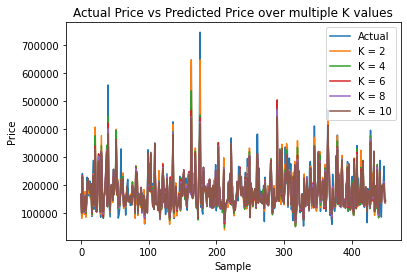

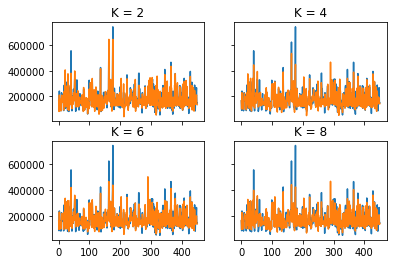

In [64]:
xplot = list(range(0, 451))
xplot = np.expand_dims(xplot,axis=1)
# plot lines
pyplot.figure(0)
pyplot.plot(xplot, Y_test, label = "Actual")
pyplot.plot(xplot, K1, label = "K = 2")
pyplot.plot(xplot, K2, label = "K = 4")
pyplot.plot(xplot, K3, label = "K = 6")
pyplot.plot(xplot, K4, label = "K = 8")
pyplot.plot(xplot, K5, label = "K = 10")
pyplot.xlabel("Sample")
pyplot.ylabel("Price")
pyplot.title("Actual Price vs Predicted Price over multiple K values")
pyplot.legend()
pyplot.show()
fig, ax = pyplot.subplots(2, 2, sharex='col', sharey='row')
ax[0, 0].set_title('K = 2')
ax[0][0].plot(xplot,Y_test,label = "Actual")
ax[0][0].plot(xplot,K1,label = "K = 2")
ax[0, 1].set_title('K = 4')
ax[0][1].plot(xplot,Y_test,label = "Actual")
ax[0][1].plot(xplot, K2,label = "K = 4",)
ax[1, 0].set_title('K = 6')
ax[1][0].plot(xplot,Y_test,label = "Actual")
ax[1][0].plot(xplot, K3,label = "K = 6")
ax[1, 1].set_title('K = 8')
ax[1][1].plot(xplot,Y_test,label = "Actual")
ax[1][1].plot(xplot, K4,label = "K = 8")

KNN is performed as in the second model. Distances are calculated from the test sample to each training samples. Unlike in the previous dataset rather then voting on the label that appeared the most, the summation of the closest neighbors would be taken and then dividing by the amount of neighbors used. Data from K = 2,6,4,8 are taken. All K predicted values are ploted against each other and the actual price values. Then a side by side plot is shown of each K's predicted values compared to the actual sale price individually. From the plots K = 4 seems to closely resemble the actual data, so a value of K = 4 is chosen as the model. 

# Part E

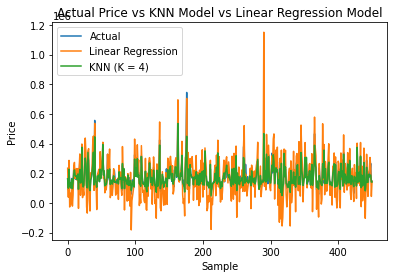

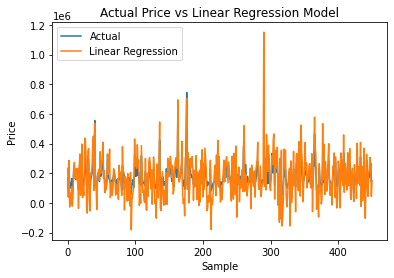

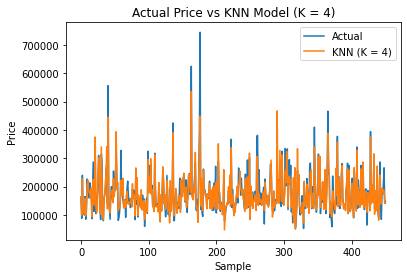

In [65]:
#Comparision of both models
pyplot.figure(0)
pyplot.plot(xplot, Y_test, label = "Actual")
pyplot.plot(xplot, LinearRegPred, label = "Linear Regression")
pyplot.plot(xplot, K2, label = "KNN (K = 4)")
pyplot.xlabel("Sample")
pyplot.ylabel("Price")
pyplot.title("Actual Price vs KNN Model vs Linear Regression Model")
pyplot.legend()
pyplot.show()
pyplot.figure(1)
pyplot.plot(xplot, Y_test, label = "Actual")
pyplot.plot(xplot, LinearRegPred, label = "Linear Regression")
pyplot.xlabel("Sample")
pyplot.ylabel("Price")
pyplot.title("Actual Price vs Linear Regression Model")
pyplot.legend()
pyplot.show()
pyplot.figure(2)
pyplot.plot(xplot, Y_test, label = "Actual")
pyplot.plot(xplot, K2, label = "KNN (K = 4)")
pyplot.xlabel("Sample")
pyplot.ylabel("Price")
pyplot.title("Actual Price vs KNN Model (K = 4)")
pyplot.legend()
pyplot.show()

Average Distance from Actual Price KNN Model: 33306661.958980042
Average Distance from Actual Price Linear Regression Model: 58986262.08909115


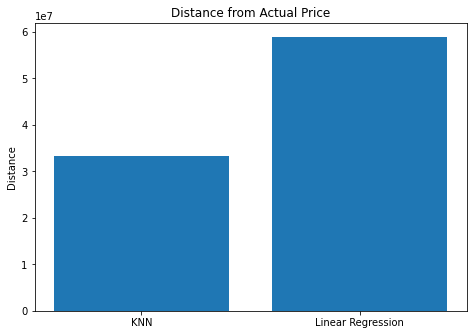

In [66]:
KNNDif = abs(Y_test - K2)
LinearDif = abs(Y_test - LinearRegPred)
AverageKNN = KNNDif.sum()/451
AverageLinear = LinearDif.sum()/451
print("Average Distance from Actual Price KNN Model:", AverageKNN)
print("Average Distance from Actual Price Linear Regression Model:", AverageLinear)
#Histogram
fig = pyplot.figure()
ax = fig.add_axes([0,0,1,1])
model = ['KNN', 'Linear Regression']
modelerror = [AverageKNN,AverageLinear]
ax.bar(model,modelerror)
ax.set_ylabel('Distance')
ax.set_title('Distance from Actual Price')
pyplot.show()

From the graph it's noted that KNN fits the model better to the actual sales price. The absolute distance is calculated from each point predicted in the model with their corresponding actual sale price. This distance is later divided by the total test samples. We can see that KNN, has a significatnly less avarege distance when compares to the average distance for linear regression. KNN does 62% better when compared to linear regression. Computattionally, linear regression was more taxing. It's running through 25000 randomly selected samples from the training set and constently updatating theta. This is unlike KNN which calauclates the 451000 distance , which is a much more simple task then linear regression. KNN in the long run, does run faster when compared to linear regression. My, final sugesstion for the method that should go into production for the dataset is KNN. 